In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /content/Data/cats_and_dogs_filtered.zip

--2024-01-19 14:41:59--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/content/Data/cats_and_dogs_filtered.zip’

/content/Data/cats_ 100%[===================>]  65.43M   284MB/s    in 0.2s    

2024-01-19 14:42:00 (284 MB/s) - ‘/content/Data/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Unzipping the file
local_zip = '/content/Data/cats_and_dogs_filtered.zip'
zipref = zipfile.ZipFile(local_zip)
zipref.extractall('/content/Data')

In [5]:
os.listdir('/content/Data/cats_and_dogs_filtered')

['train', 'validation', 'vectorize.py']

In [6]:
print(os.listdir('/content/Data/cats_and_dogs_filtered/train'))
print(os.listdir('/content/Data/cats_and_dogs_filtered/validation'))

['cats', 'dogs']
['cats', 'dogs']


In [8]:
base_dir = '/content/Data/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir,'train')
val_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
val_cats_dir = os.path.join(val_dir, 'cats')
val_dogs_dir = os.path.join(val_dir, 'dogs')

In [9]:
print('Number of training cat images   : ', len(os.listdir(train_cats_dir)))
print('Number of training dog images   : ', len(os.listdir(train_dogs_dir)))
print('Number of validation cat images : ', len(os.listdir(val_cats_dir)))
print('Number of validation dog images : ', len(os.listdir(val_dogs_dir)))

Number of training cat images   :  1000
Number of training dog images   :  1000
Number of validation cat images :  500
Number of validation dog images :  500


In [11]:
print(os.listdir(train_cats_dir)[:5])
print(os.listdir(train_dogs_dir)[:5])
print(os.listdir(val_cats_dir)[:5])
print(os.listdir(val_dogs_dir)[:5])

['cat.453.jpg', 'cat.118.jpg', 'cat.780.jpg', 'cat.985.jpg', 'cat.722.jpg']
['dog.584.jpg', 'dog.623.jpg', 'dog.146.jpg', 'dog.938.jpg', 'dog.420.jpg']
['cat.2033.jpg', 'cat.2170.jpg', 'cat.2317.jpg', 'cat.2362.jpg', 'cat.2105.jpg']
['dog.2283.jpg', 'dog.2238.jpg', 'dog.2494.jpg', 'dog.2166.jpg', 'dog.2204.jpg']


(-0.5, 499.5, 373.5, -0.5)

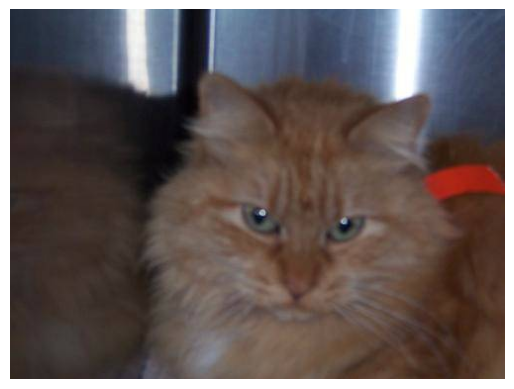

In [21]:
# Accessing and visualizing a cat image
cat_image_path = os.path.join(train_cats_dir, 'cat.118.jpg')
cat_image = mpimg.imread(cat_image_path)
# cat_image.shape
plt.imshow(cat_image)
plt.axis('off')

(-0.5, 313.5, 306.5, -0.5)

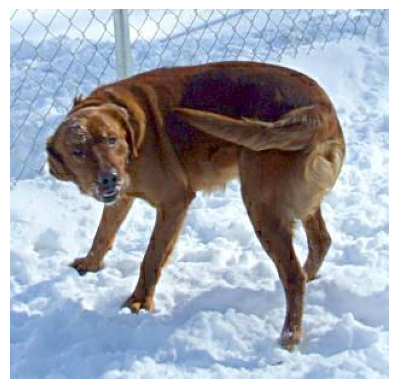

In [22]:
# Accessing and visualizing a dog image
dog_image_path = os.path.join(train_dogs_dir, 'dog.420.jpg')
dog_image = mpimg.imread(dog_image_path)
# dog_image.shape
plt.imshow(dog_image)
plt.axis('off')

In [28]:
cat_images = os.listdir(train_cats_dir)[:30]
dog_images = os.listdir(train_dogs_dir)[:30]

cat_image_paths = [os.path.join(train_cats_dir, image) for image in cat_images]
dog_image_paths = [os.path.join(train_dogs_dir, image) for image in dog_images]

image_paths = cat_image_paths + dog_image_paths
print(len(image_paths))

60


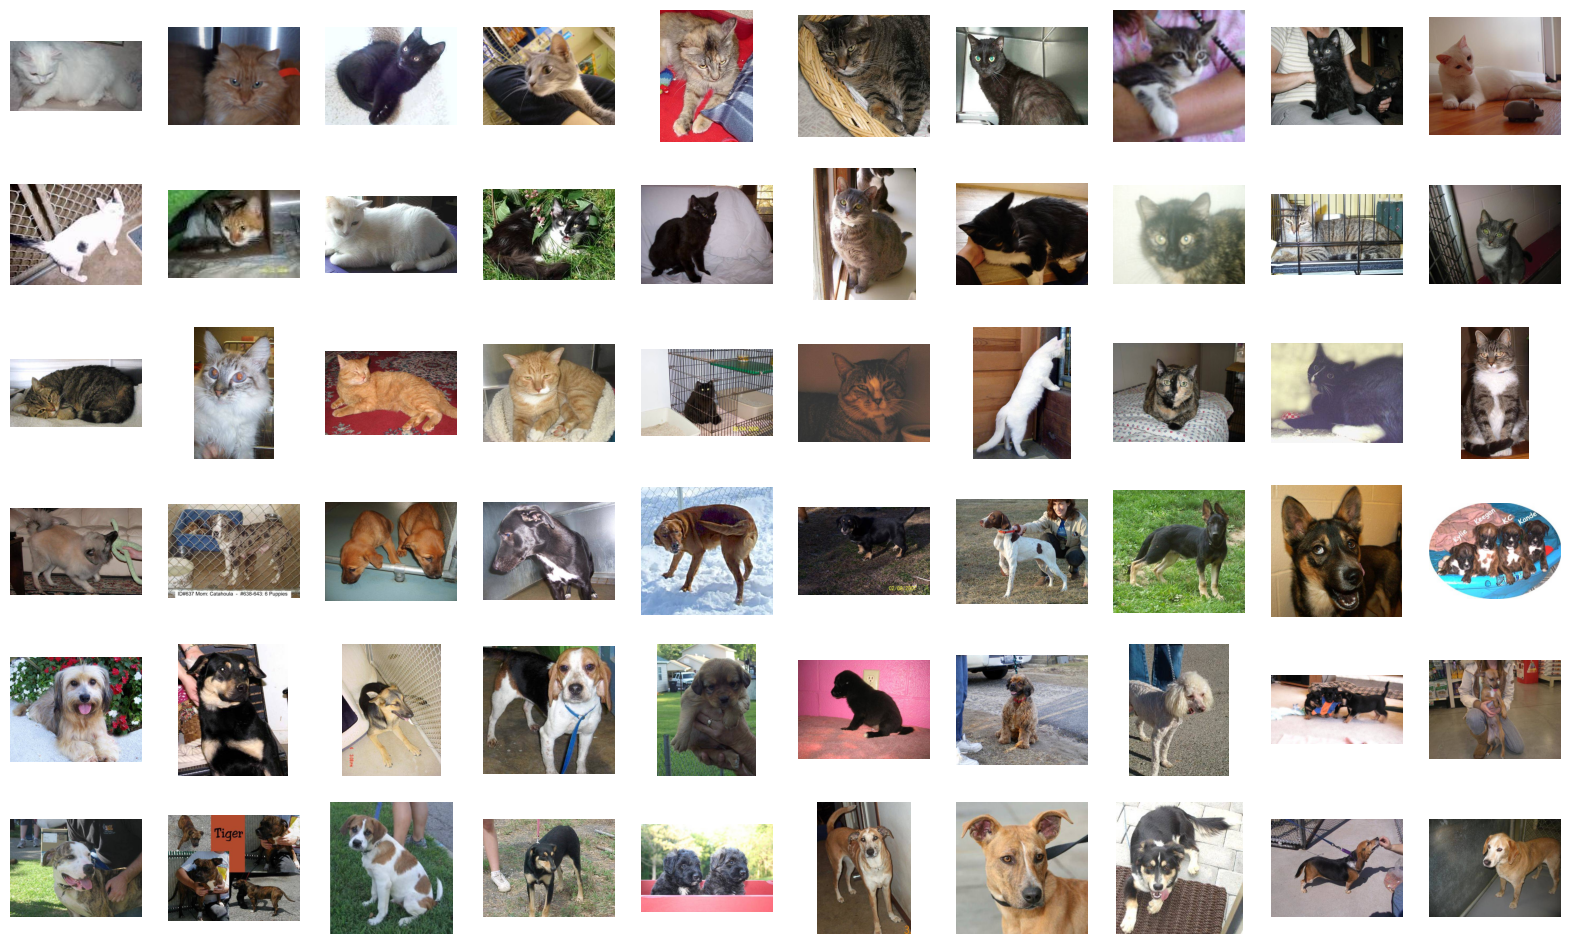

In [30]:
plt.figure(figsize = (20,12))
for i in range(60):
  plt.subplot(6,10, i+1)
  plt.axis('off')
  image = mpimg.imread(image_paths[i])
  plt.imshow(image)

---
---

In [38]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 0.2,
    zoom_range = 0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    vertical_flip = True,
    horizontal_flip = True
)

# Flow from directory is used when the data is on secondary storage
train_generator = train_datagen.flow_from_directory(
      train_dir,
      batch_size = 40,
      class_mode = 'binary',
      target_size = (150,150)
)

Found 2000 images belonging to 2 classes.


In [39]:
val_datagen = ImageDataGenerator(rescale = 1/255)
val_generator =  val_datagen.flow_from_directory(
      val_dir,
      batch_size = 40,
      class_mode = 'binary',
      target_size = (150, 150)
)

Found 1000 images belonging to 2 classes.


---
---

In [40]:
model = tf.keras.models.Sequential()
model.add(Flatten(input_shape = (150,150,3)))
model.add(Dense(500, activation = 'relu'))
model.add(Dense(300, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 67500)             0         
                                                                 
 dense_8 (Dense)             (None, 500)               33750500  
                                                                 
 dense_9 (Dense)             (None, 300)               150300    
                                                                 
 dense_10 (Dense)            (None, 100)               30100     
                                                                 
 dense_11 (Dense)            (None, 1)                 101       
                                                                 
Total params: 33931001 (129.44 MB)
Trainable params: 33931001 (129.44 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [41]:
model.compile(loss = 'binary_crossentropy',
              optimizer = SGD(),
              metrics = ['accuracy'])

In [42]:
history = model.fit(
    train_generator,
    validation_data = (val_generator),
    epochs = 40,
    verbose = 1
)

Epoch 1/40
50/50 [==============================] - 16s 304ms/step - loss: 0.7242 - accuracy: 0.5010 - val_loss: 0.6900 - val_accuracy: 0.5140
Epoch 2/40
50/50 [==============================] - 15s 301ms/step - loss: 0.6975 - accuracy: 0.5105 - val_loss: 0.6866 - val_accuracy: 0.5480
Epoch 3/40
50/50 [==============================] - 14s 290ms/step - loss: 0.6974 - accuracy: 0.5290 - val_loss: 0.6839 - val_accuracy: 0.5460
Epoch 4/40
50/50 [==============================] - 15s 294ms/step - loss: 0.6926 - accuracy: 0.5415 - val_loss: 0.6829 - val_accuracy: 0.5690
Epoch 5/40
50/50 [==============================] - 15s 291ms/step - loss: 0.6871 - accuracy: 0.5425 - val_loss: 0.8383 - val_accuracy: 0.5000
Epoch 6/40
50/50 [==============================] - 16s 314ms/step - loss: 0.6875 - accuracy: 0.5555 - val_loss: 0.6849 - val_accuracy: 0.5470
Epoch 7/40
50/50 [==============================] - 15s 292ms/step - loss: 0.6880 - accuracy: 0.5630 - val_loss: 0.6735 - val_accuracy: 0.5740

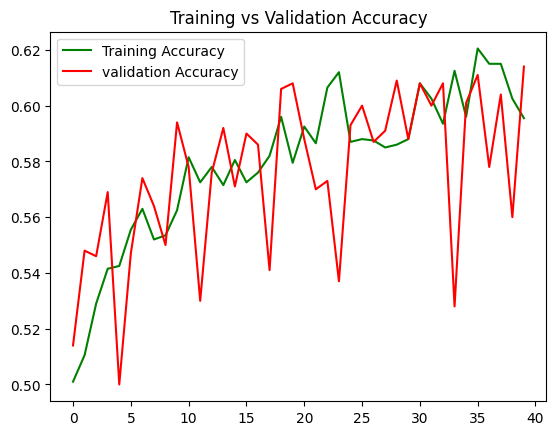

In [43]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(train_acc , color = 'green', label = 'Training Accuracy')
plt.plot(val_acc , color = 'red', label = 'validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

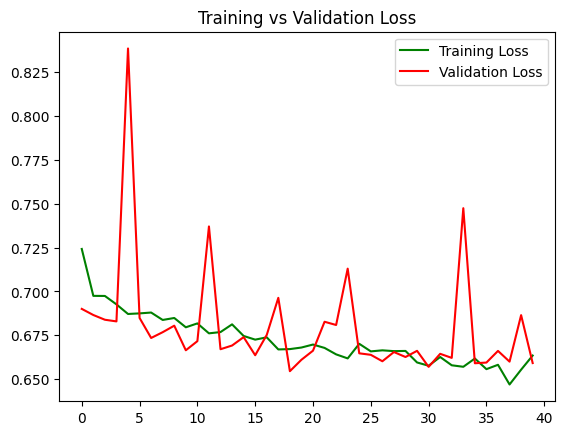

In [44]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(train_loss , color = 'green', label = 'Training Loss')
plt.plot(val_loss , color = 'red', label = 'Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()